In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<br>

In [25]:
# loading raw data
raw_data = pd.read_csv("../data/raw_data.csv")
# changing column names
new_columns = ["median_income", "house_age", "average_rooms", "average_bedrooms", "population", "average_occupancy", "latitude", "longitude", "median_house_value"]
raw_data.columns = new_columns

In [26]:
# inspecting data
raw_data.head()

,median_income,house_age,average_rooms,average_bedrooms,population,average_occupancy,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<br>

### Splitting into training and test data

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
# sorting house value into 5 bins 
house_value_bins = pd.cut(raw_data.median_house_value, bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.1], labels=[0, 1, 2, 3, 4])
# creating training and testing data
# that is proportionate to house value bins
training_data, testing_data = train_test_split(raw_data, test_size=0.2, stratify=house_value_bins, shuffle=True, random_state=42)

In [23]:
# saving training_data to csv
training_data.to_csv("../data/training_data.csv", index=None)

In [24]:
# saving testing_data to csv
testing_data.to_csv("../data/testing_data.csv", index=None)

<br>
<br>

### Creating capped training set

In [3]:
# loading training data
training_data = pd.read_csv("../data/training_data.csv")

In [4]:
# caps data with 3 iterquantile range
def cap_to_3_iqr(series: pd.Series) -> pd.Series:
    qnt_25: float = series.quantile(0.25)
    qnt_75: float = series.quantile(0.75)
    iqr: float = qnt_75 - qnt_25
    min_value = qnt_25 - 3*iqr
    max_value = qnt_75 + 3*iqr
    series = series.apply(lambda x: min_value if x < min_value else x)
    series = series.apply(lambda x: max_value if x > max_value else x)
    return series

In [5]:
# features to cap
features_to_cap = training_data.columns[:6]
features_to_cap

Index(['median_income', 'house_age', 'average_rooms', 'average_bedrooms',
       'population', 'average_occupancy'],
      dtype='object')

In [6]:
# capping features
for col_name in features_to_cap:
    training_data[col_name] = cap_to_3_iqr(training_data[col_name])

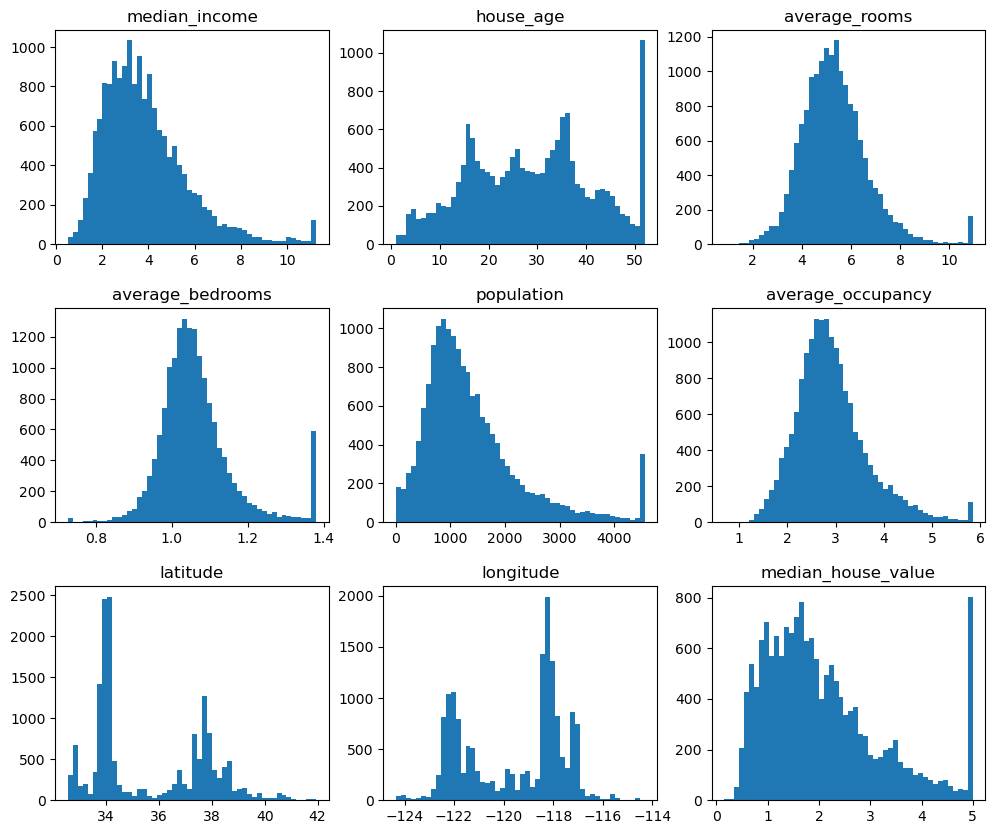

In [7]:
# histogram of new data
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)
for i, col_name in enumerate(training_data.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(training_data[col_name], bins=50)
    plt.title(col_name)
plt.show()
# plt.savefig("../visualizations/capped_features_hist.jpg")

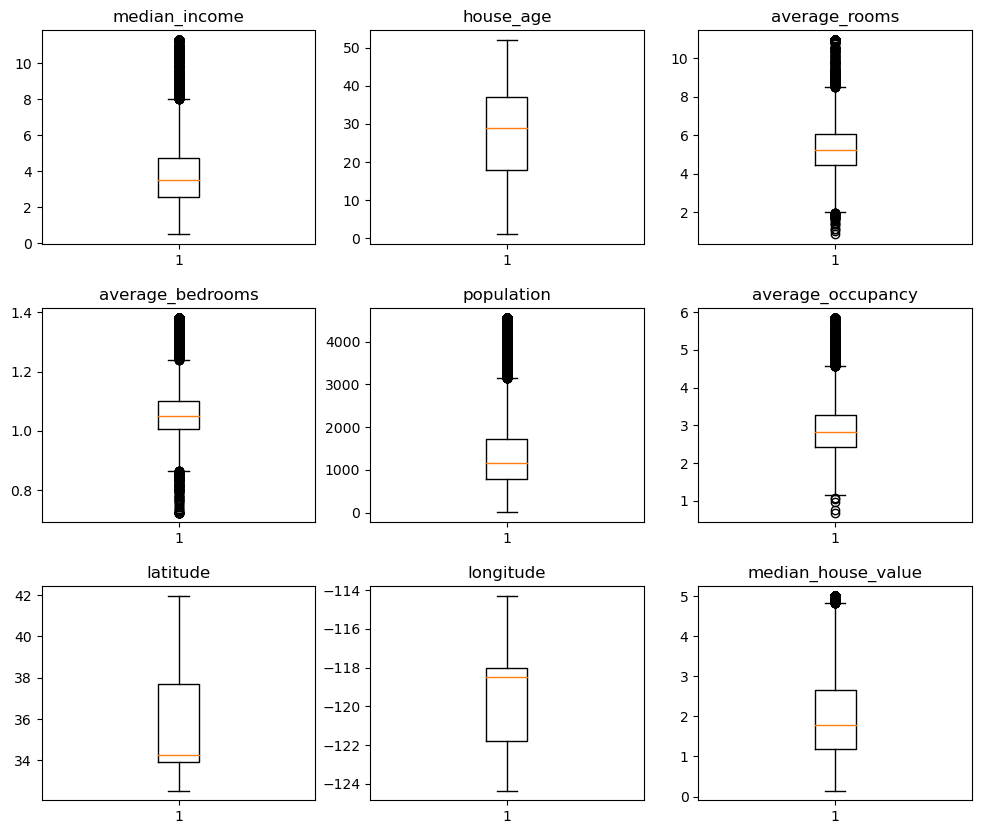

In [8]:
# boxplot of new data
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)
for i, col_name in enumerate(training_data.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(training_data[col_name])
    plt.title(col_name)
plt.show()
# plt.savefig("../visualizations/capped_features_boxplot.jpg")

In [9]:
# saving capped data
training_data.to_csv("../data/training_data_capped.csv", index=False)